<a href="https://colab.research.google.com/github/HarisJafri-xcode/Python-for-DS/blob/main/07-Projects/Investigating_Netflix_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

Client want you to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset netflix_data.csv, feel free to experiment.

Client wants to find which Actor was the most consistent in 90s Era Cast.
Client want to know what Movie Lengths were to be considered an Outlier in 90s. Where these Outliers majorly hit or flop ?

# Importing Relevant Data Science Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style

# Analyze the Data Frame

In [3]:
file_path = 'https://raw.githubusercontent.com/HarisJafri-xcode/Python-for-DS/refs/heads/main/05-Datasets/netflix_data.csv'

In [4]:
df = pd.read_csv(file_path)

In [5]:
df.shape

(7787, 11)

In [6]:
df.size

85657

In [7]:
df.ndim

2

# Information about DataFrame and DataSet

In [8]:
df.info() # Information about DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   duration      7787 non-null   int64 
 9   description   7787 non-null   object
 10  genre         7787 non-null   object
dtypes: int64(2), object(9)
memory usage: 669.3+ KB


"date_added" should also be datetime dtype and not object.

In [9]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas


In [10]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      5398 non-null   object        
 4   cast          7069 non-null   object        
 5   country       7280 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   duration      7787 non-null   int64         
 9   description   7787 non-null   object        
 10  genre         7787 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 669.3+ KB


The 'date_added'  column has been successfully converted to datetime objects. You can see the updated data types above.

In [11]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,93,After a devastating earthquake hits Mexico Cit...,Dramas


# 90s Movie Era

In [12]:
mask_90s_movies = (df['release_year'] >= 1990) & (df['release_year'] <= 1999)
df_90s_movies = df[mask_90s_movies]
df_90s_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,1997,119,After one of his high school students attacks ...,Dramas
166,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,2018-04-01,1993,101,At the center of this engrossing melodrama is ...,Dramas
210,s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,2019-12-01,1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies
238,s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, ...",United States,2020-12-01,1996,108,When a philandering club promoter sets out to ...,Comedies
273,s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...",India,2017-06-01,1993,154,"Raised by a kindly thief, orphaned Jimmy goes ...",Dramas


In [13]:
df_90s_movies.shape

(225, 11)

What was released in 1990s apart from a "Movie" ?

In [14]:
df_90s_movies['type'].value_counts(dropna=False)

,count
type,
Movie,194
TV Show,31


In [15]:
df_90s_movies_only = df_90s_movies[df_90s_movies['type'] == 'Movie']
df_90s_movies_only.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,1997,119,After one of his high school students attacks ...,Dramas
166,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,2018-04-01,1993,101,At the center of this engrossing melodrama is ...,Dramas
210,s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,2019-12-01,1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies
238,s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, ...",United States,2020-12-01,1996,108,When a philandering club promoter sets out to ...,Comedies
273,s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...",India,2017-06-01,1993,154,"Raised by a kindly thief, orphaned Jimmy goes ...",Dramas


In [16]:
df_90s_movies_only.shape

(194, 11)

So we have got our hand on the DataFrame where "type" is "Movie" and "release_year" is between 1990 and 1999.

Now we need to find answers for Client.
1. Which Actor used to appear quite often.
2. What was Normal Movie Length and What was an Outlier Movie Length ?

In [17]:
df_90s_movies_only.loc[:, 'cast'] = df_90s_movies_only['cast'].fillna('')
all_actors = df_90s_movies_only['cast'].str.split(', ').explode()
actor_counts = all_actors.value_counts()
print(actor_counts.head(10))

cast
Shah Rukh Khan       12
Anupam Kher           9
Mohnish Bahl          7
Salman Khan           7
Alok Nath             6
Karisma Kapoor        6
Amrish Puri           5
Samuel L. Jackson     5
Tinnu Anand           5
Gulshan Grover        5
Name: count, dtype: int64


In [18]:
print(df_90s_movies_only['duration'].describe())

count    194.000000
mean     113.917526
std       34.195921
min       28.000000
25%       93.250000
50%      108.000000
75%      134.500000
max      204.000000
Name: duration, dtype: float64


In [19]:
Q1 = df_90s_movies_only['duration'].quantile(0.25)
Q3 = df_90s_movies_only['duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_movies = df_90s_movies_only[(df_90s_movies_only['duration'] < lower_bound) | (df_90s_movies_only['duration'] > upper_bound)]

print(f"Lower bound for outliers: {lower_bound:.2f} minutes")
print(f"Upper bound for outliers: {upper_bound:.2f} minutes")
print("\nOutlier Movies (by duration):")
outlier_movies[['title', 'duration', 'genre']]

Lower bound for outliers: 31.38 minutes
Upper bound for outliers: 196.38 minutes

Outlier Movies (by duration):


,title,duration,genre
919,Bill Hicks: One Night Stand,28,Stand-Up
2155,Fifty Year Old Teenager,204,Comedies
4645,One Last Shot,31,Comedies
7089,Tim Allen: Men Are Pigs,30,Stand-Up
7090,Tim Allen: ReWires America,30,Stand-Up


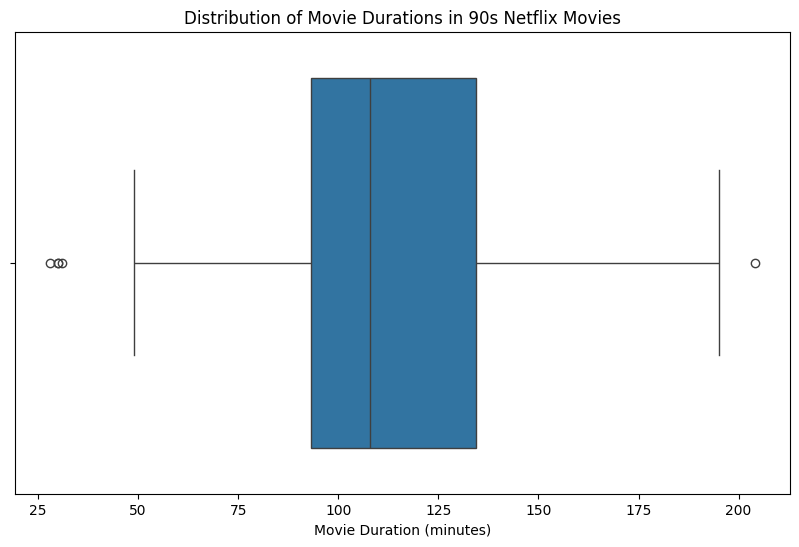

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_90s_movies_only['duration'])
plt.title('Distribution of Movie Durations in 90s Netflix Movies')
plt.xlabel('Movie Duration (minutes)')
plt.show()